# DSP Q3. Simulation for assignment 2

#### Let $x(t) = rect(t)$, where $t$ is measured in seconds. That is, $x(t) = 1 for$ $t \in [-0.5; 0.5]$, and 0 otherwise. 

This signal is sampled at the following rates and then reconstructed as $\hat x(t)$ using a corresponding sinc reconstruction filter:

(a) $fs = 1 Hz$

(b) $fs = 10 Hz$

(c) $fs = 100 Hz$

Plot the reconstructed output $\hat x(t)$ for each case above, and compute the sum squared error : 
\begin{equation}
\int_{-\infty}^{\infty} |x(t) - \hat x(t) |^{2}
\end{equation}
in each case (you can approximate this using the numpy.trapz function). What is your observation? Explain.

##**Solution**

Firstly, we import the libraries as shown below. $Numpy$ and $matplotlib.pyplot$ for numerical computation and plotting respectively. Also, we specify the sampling frequency as given in the question.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
 
f1 = 1
f2 = 10
f3 = 100

Now, we define the $rect\_sampled$ function which takes the sampling frequency as input and generates corresponding sampled version of rectangular function.

In [ ]:
def rect_sampled(fs):
  T = 10                                # Interval for which the signal will be defined. 10 means, it will be for -5 to 5
  t = np.arange(-T//2,T//2 + 1/fs,1/fs)      # +1 to include the final point sample as well

  y = np.where((np.abs(t) <= 0.5),1,0)  #discrete sampled rectangular signal with number of samples = 1/fs
  return t,y

Here, a reconstruction function is defined which again takes in sampled signal and frequency of the sinc pulse. Then, we define the range of sinc from -5 to 5 with a small time spacing between each sample so that the signal appears continuous. Later, we generate the sinc pulse for the particular range.

In order to obtain the original signal back from the sampled signal, we pass it through a low pass filter of cutoff frequency $f_{c}$ in frequency domain. This specifies convolution of sampled signal with $sinc(f_c t)$ in time domain.

\begin{equation}
X_c(j \Omega) \cdot rect(\frac{\Omega}{\Omega_c}) = \frac{1}{2\pi} \int_{-\infty}^{\tau} x_c(\tau) \cdot sinc(f_c(t - \tau)) d\tau  
\end{equation}

where $X_c(j\Omega)$ is the fourier transform of sampled signal, periodic with $\Omega = 2\pi f_c$. Also the sampling frequency has to be higher than twice the maximum frequency present in the original signal.

In [ ]:
def reconstruction(y1,fs):
  t = np.linspace(-5,5,10000) # t axis for reconstructed signal
  num_coeffs=len(y1)
  final_rect=0
  for k in range(-num_coeffs,0,1): # since function is real, need both sides
    final_rect += (y1[k])*np.sinc( k + num_coeffs//2 + 1 - fs*t)  #num_coeffs //2 added to make the shift towards the center

  '''  
  Here the way of convolving is, since y1 has say 11 samples, so we iterate from -11 to -1, meanwhile we shift the sinc pulse at k + (N/2) + 1after reversing so that it is at center
  N/2 is added because -11 sample corresponds to -11 + N/2 + 1 instant of time, -10 sample corresponds to -10 + N/2 + 1 instant of time and so on.

  '''
  return t,final_rect 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warnin

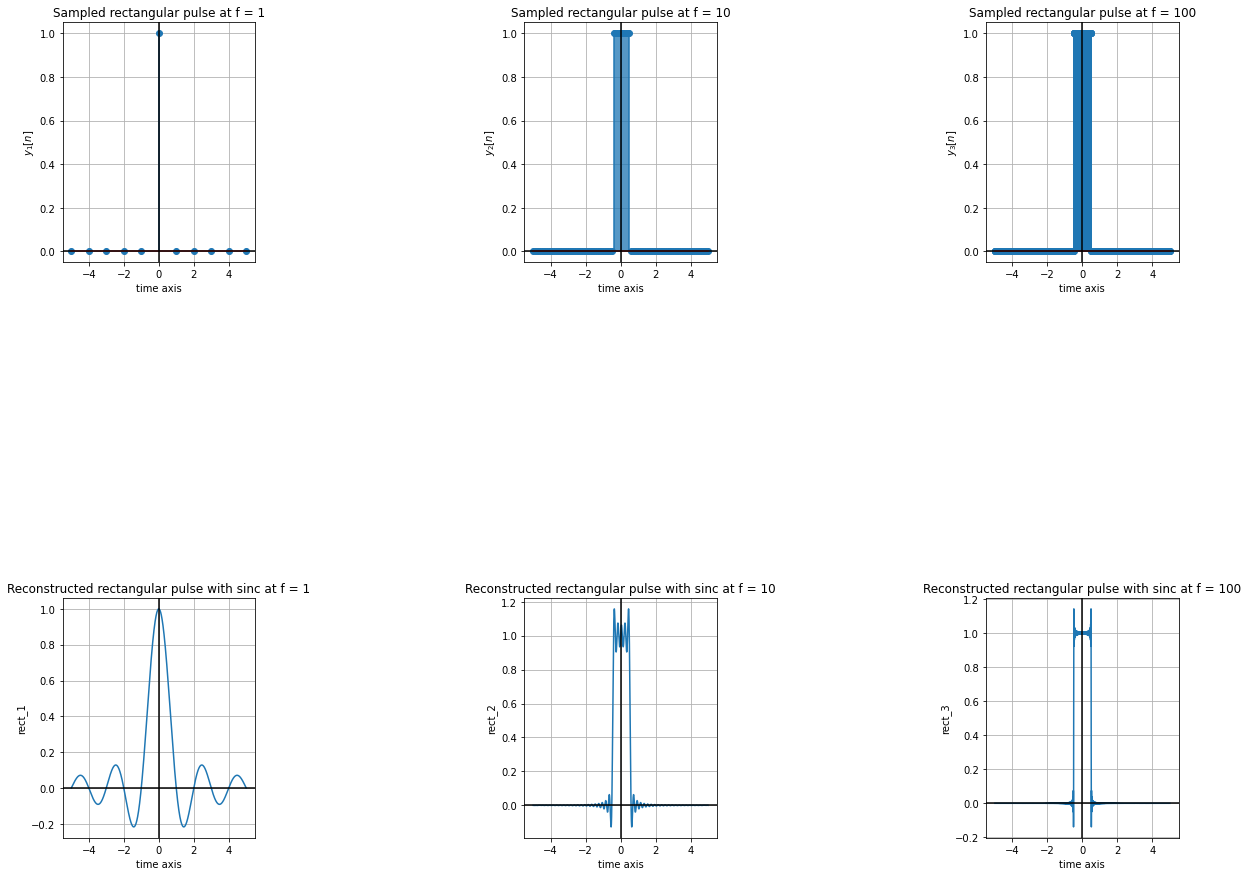

In [ ]:
t1,y1 = rect_sampled(f1)
t2,y2 = rect_sampled(f2)
t3,y3 = rect_sampled(f3)

figure = plt.figure(figsize = [20,15])

figure.add_subplot(3,5,1)
plt.stem(t1,y1)
plt.title("Sampled rectangular pulse at f = 1")
plt.xlabel("time axis")
plt.ylabel("$y_{1}[n]$")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")


figure.add_subplot(3,5,3)
plt.stem(t2,y2)
plt.title("Sampled rectangular pulse at f = 10")
plt.xlabel("time axis")
plt.ylabel("$y_{2}[n]$")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")


figure.add_subplot(3,5,5)
plt.stem(t3,y3)
plt.title("Sampled rectangular pulse at f = 100")
plt.xlabel("time axis")
plt.ylabel("$y_{3}[n]$")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")


t_sinc_1, rect_1 = reconstruction(y1,1)
t_sinc_2, rect_2 = reconstruction(y2,10)
t_sinc_3, rect_3 = reconstruction(y3,100)


figure.add_subplot(3,5,11)
plt.plot(t_sinc_1,rect_1)
plt.title("Reconstructed rectangular pulse with sinc at f = 1")
plt.xlabel("time axis")
plt.ylabel("rect_1")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")

figure.add_subplot(3,5,13)
plt.plot(t_sinc_2,rect_2)
plt.title("Reconstructed rectangular pulse with sinc at f = 10")
plt.xlabel("time axis")
plt.ylabel("rect_2")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")

figure.add_subplot(3,5,15)
plt.plot(t_sinc_3,rect_3)
plt.title("Reconstructed rectangular pulse with sinc at f = 100")
plt.xlabel("time axis")
plt.ylabel("rect_3")
plt.grid()
plt.axhline(color = "black")
plt.axvline(color = "black")


plt.show()


The mean squared error goes on decreasing here as we increase the number of samples

In [ ]:
Ideal_rect = np.where(abs(t_sinc_1)<= 0.5, 1, 0)

e1 = np.trapz((Ideal_rect - rect_1)**2)
e2 = np.trapz((Ideal_rect - rect_2)**2)
e3 = np.trapz((Ideal_rect - rect_3)**2)

print("Error in {0} Hz sampled rectangle pulse is {1}".format(1,e1))
print("Error in {0} Hz sampled rectangle pulse is {1}".format(10,e2))
print("Error in {0} Hz sampled rectangle pulse is {1}".format(100,e3))

Error in 1 Hz sampled rectangle pulse is 234.41676678690624
Error in 10 Hz sampled rectangle pulse is 75.89408579670956
Error in 100 Hz sampled rectangle pulse is 7.588289185591102


##Observation

Since the rectangular pulse signal contains infinite frequencies present in itself, (band unlimited as the fourier transform of rectangular signal exists for entire frequency domain, from $-\infty$ to $+\infty$, it will always be aliased. This can be improved by taking as large number of samples as possible. For example if sampling frequency is 1 kHz, the following thing can be obtained.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

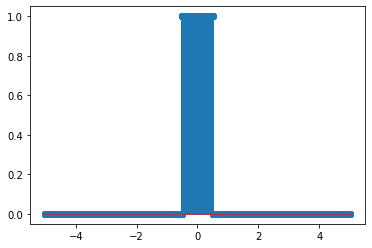

In [ ]:
fs = 1000

t_rect, y = rect_sampled(fs)

plt.stem(t_rect,y) #almost continuous, but it isn't. For a time range of -5 to 5 and sampling frequency of 1000, it has a sample after every 0.001 second.

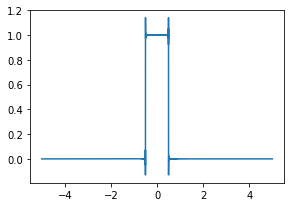

In [ ]:
f_Rec = 1000

t_sinc,rect = reconstruction(y,f_Rec)

figure = plt.figure(figsize = [10,7])

figure.add_subplot(2,2,1)

plt.plot(t_sinc,rect)



Thus, more the sampling rate, better the reconstruction

In [ ]:
e4 = np.trapz((Ideal_rect - rect)**2)

print("Error in {0} Hz sampled rectangle pulse is {1}".format(1000,e4))

Error in 1000 Hz sampled rectangle pulse is 0.6403397886916643
